In [1]:
import tensorflow as tf

In [44]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

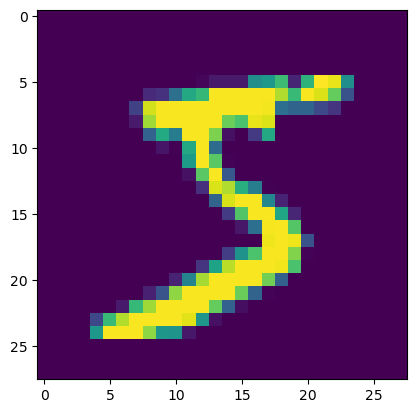

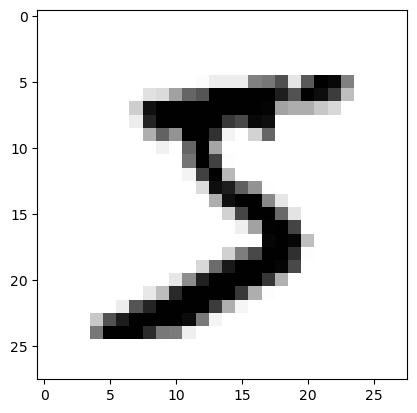

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

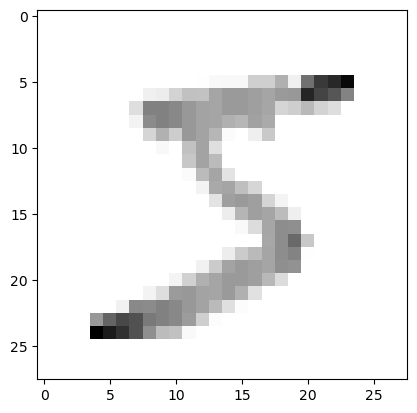

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])

5


In [10]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training samples dimension", x_trainr.shape)
print("Testing samples dimension", x_testr.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [12]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [15]:
print("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [17]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5


1313/1313 [==============================] - 14s 10ms/step - loss: 0.3326 - accuracy: 0.8983 - val_loss: 0.1283 - val_accuracy: 0.9618
Epoch 2/5
1313/1313 [==============================] - 15s 11ms/step - loss: 0.1098 - accuracy: 0.9668 - val_loss: 0.0942 - val_accuracy: 0.9713
Epoch 3/5
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0770 - accuracy: 0.9764 - val_loss: 0.0769 - val_accuracy: 0.9766
Epoch 4/5
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0616 - accuracy: 0.9809 - val_loss: 0.0763 - val_accuracy: 0.9767
Epoch 5/5
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.0630 - val_accuracy: 0.9806


In [18]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0559 - accuracy: 0.9824
Test loss on 10,000 test samples 0.055891040712594986
Validation accuracy on 10,000 test samples 0.9824000000953674


In [19]:
predictions = model.predict([x_testr])


313/313 [==============================] - 1s 4ms/step


In [20]:
print(predictions)

[[5.3902022e-07 1.7073133e-05 1.0171101e-05 ... 9.9996662e-01
  2.0981973e-07 3.2627120e-06]
 [6.1468178e-05 1.9575498e-06 9.9984646e-01 ... 1.2655699e-05
  2.7139879e-05 8.3272619e-07]
 [4.1360636e-07 9.9979001e-01 9.0428337e-08 ... 1.7929186e-06
  9.5591786e-05 2.7848992e-06]
 ...
 [1.2989528e-08 1.4969510e-07 5.3191023e-08 ... 2.6061584e-06
  2.0740124e-05 2.1690506e-05]
 [3.9995348e-06 2.1155238e-07 1.2053092e-08 ... 8.4874801e-09
  1.7983137e-03 2.5151616e-05]
 [9.8651772e-06 3.1707569e-07 3.2055466e-06 ... 8.2283691e-08
  6.2700630e-05 3.5190249e-05]]


In [21]:
print(np.argmax(predictions[0]))

7


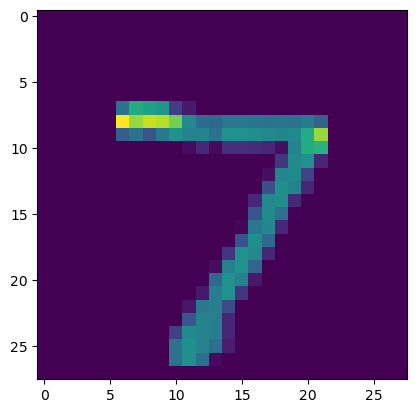

In [22]:
plt.imshow(x_test[0])

In [23]:
print(np.argmax(predictions[128]))

8


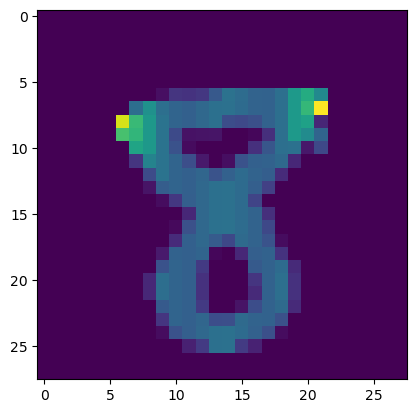

In [24]:
plt.imshow(x_test[128])

In [25]:
import cv2

In [26]:
img = cv2.imread('three.png')

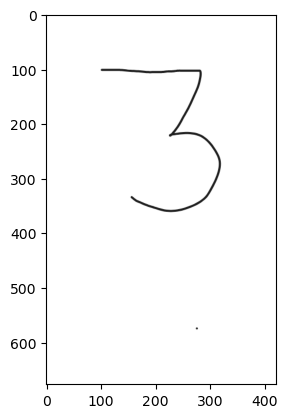

In [27]:
plt.imshow(img)

In [28]:
img.shape

(677, 421, 3)

In [29]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [30]:
gray.shape

(677, 421)

In [31]:
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

In [32]:
resized.shape

(28, 28)

In [33]:
newimg = tf.keras.utils.normalize(resized, axis=1)

In [34]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [35]:
newimg.shape

(1, 28, 28, 1)

In [36]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 169ms/step


In [37]:
print(np.argmax(predictions))

0


In [50]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN


cap = cv2.VideoCapture('check.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")


text = "Some text in a box!"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))

cntr = 0
while True:
    res, frame = cap.read()
    if frame is None: break
    cntr = cntr + 1
    if cntr % 3 == 0:
        frame = cv2.resize(frame,(0,0),None,0.65,0.65)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)
        newimg = tf.keras.utils.normalize(resized, axis=1)
        newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        predictions = model.predict(newimg)
        status = np.argmax(predictions)
        print(status)
        print(type(status))

        x1, y1, w1, h1 = 0, 0, 175, 175
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 255, 0), -1)
        cv2.putText(frame, status.astype(str), (x1 + int(w1 / 5), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        cv2.imshow('Handwritten Digits Recognition', frame)

        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 26ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 29ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 22ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 13ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 13ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 33ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 30ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 14ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 37ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 34ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 31ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 24ms/step
2
<class 'numpy.int64'>
1/1 [=======

In [39]:
tf.saved_model.save(model, "./lite")

INFO:tensorflow:Assets written to: ./lite\assets


INFO:tensorflow:Assets written to: ./lite\assets
